# MediaPipe Pose Estimation

Simple pose estimation using Google's MediaPipe library - runs locally on your M2 Mac.

In [1]:
# Install mediapipe if needed
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 18.6/19.3 MB 1.0 MB/s eta 0:00:01^C
Traceback (most recent call last):
  File "/opt/miniconda3/bin/pip", line 11, in <module>
    sys.exit(main())
             ^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-packages/pip/_internal/cli/main.py", line 79, in main
    return command.main(cmd_args)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 101, in main
    return self._main(args)
           ^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 236, in _main
    self.handle_pip_version_check(options)
  File "/opt/miniconda3/lib/python3.12/site-packages/pip/_internal/cli/req_command.py", line 177, in handle_pip_version_check
    session = self._build_session(
              ^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/site-packages/pip/_internal/cli/req_command.py", line 122, in _build_sessi

In [2]:
from mediapipe import solutions


Image shape: (426, 640, 3)


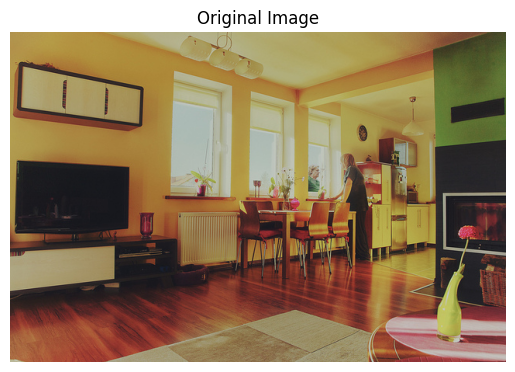

In [3]:
import cv2
import requests
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Load a sample image (same as vitpose example)
url = "http://images.cocodataset.org/val2017/000000000139.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image_rgb = np.array(image)

print(f"Image shape: {image_rgb.shape}")
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [4]:
# Run pose estimation
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,  # 0, 1, or 2 - higher is more accurate but slower
    min_detection_confidence=0.5
) as pose:
    
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        print("Pose detected!")
        
        # Draw the pose on a copy of the image
        annotated_image = image_rgb.copy()
        
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )
        
        # Display result
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))
        
        axes[0].imshow(image_rgb)
        axes[0].set_title("Original")
        axes[0].axis('off')
        
        axes[1].imshow(annotated_image)
        axes[1].set_title("MediaPipe Pose Estimation")
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No pose detected in image")

I0000 00:00:1768652890.947699 7479228 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1768652891.062306 7484947 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1768652891.119221 7484949 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


No pose detected in image


W0000 00:00:1768652891.230741 7484949 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [5]:
# Print keypoint details
if results.pose_landmarks:
    print("\nDetected Keypoints:")
    print("-" * 50)
    
    for idx, landmark in enumerate(results.pose_landmarks.landmark):
        # Get keypoint name from MediaPipe
        keypoint_name = mp_pose.PoseLandmark(idx).name
        
        # Convert normalized coords to pixel coords
        x = landmark.x * image_rgb.shape[1]
        y = landmark.y * image_rgb.shape[0]
        
        print(f"{keypoint_name}: x={x:.1f}, y={y:.1f}, confidence={landmark.visibility:.2f}")

I0000 00:00:1768653134.782337 7479228 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M2
W0000 00:00:1768653134.901592 7505184 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1768653134.949177 7505187 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


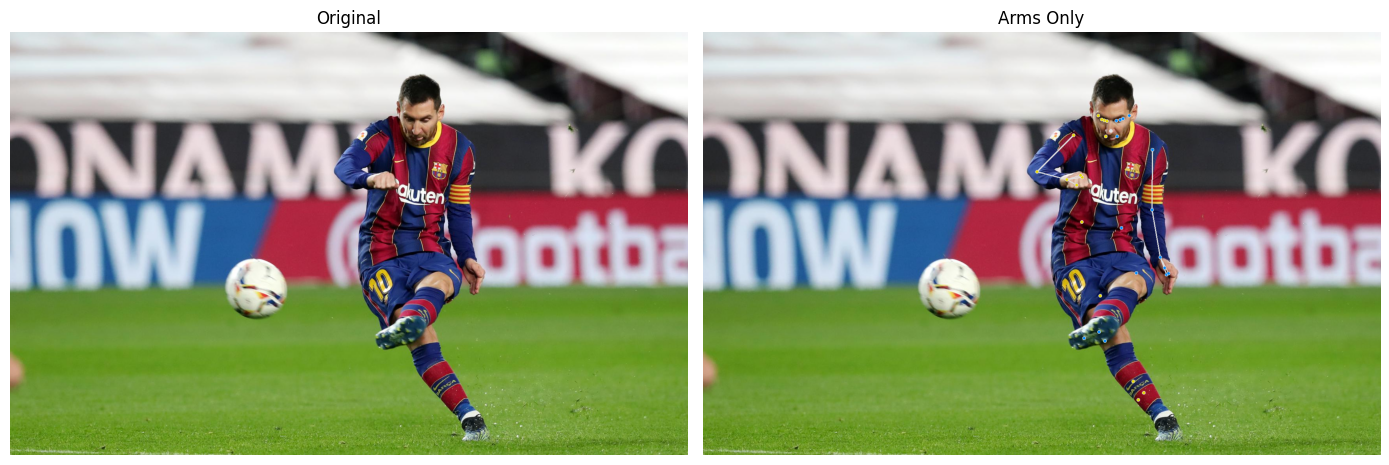

In [9]:
# Try with a different image - one with clearer pose
url2 = "https://www.fcbarcelona.com/fcbarcelona/photo/2021/01/31/3c55a19f-dfc1-4451-885e-afd14e890a11/mini_2021-01-31-BARCELONA-ATHLETIC-BILBAOI-30.JPG"

response2 = requests.get(url2)
image2 = Image.open(BytesIO(response2.content))
image2_rgb = np.array(image2)

# Define arm-only connections
ARM_CONNECTIONS = frozenset([
    # Left arm
    (11, 13),  # left shoulder -> left elbow
    (13, 15),  # left elbow -> left wrist
    (15, 17),  # left wrist -> left pinky
    (15, 19),  # left wrist -> left index
    (15, 21),  # left wrist -> left thumb
    # Right arm
    (12, 14),  # right shoulder -> right elbow
    (14, 16),  # right elbow -> right wrist
    (16, 18),  # right wrist -> right pinky
    (16, 20),  # right wrist -> right index
    (16, 22),  # right wrist -> right thumb
])

with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5
) as pose:
    
    results2 = pose.process(image2_rgb)
    
    annotated_image2 = image2_rgb.copy()
    
    if results2.pose_landmarks:
        mp_drawing.draw_landmarks(
            annotated_image2,
            results2.pose_landmarks,
            ARM_CONNECTIONS,  # Only draw arms
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    axes[0].imshow(image2_rgb)
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    axes[1].imshow(annotated_image2)
    axes[1].set_title("Arms Only")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
